In [2]:
import pandas as pd

# import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
# warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [3]:
def load_old_feat():
    spammer_order = "../data/spammer_order.csv"
    feat_list = ['post_num', 'follower_num', 'followee_num', 'content_similar',
     'figure_jing', 'figure_url', 'figure_face', 'figure_RRT', 'figure_face_every',
     'figure_jing_every', 'figure_url_every', 'figure_url_single', 'figure_jing_single',
     'figure_at', 'figure_at_every', 'figure_at_single', 'average_repost', 'average_comm',
     'late_night_times', 'is_regular', 'shorttime_times', 'active_day_ratio', 'day_interval_variance',
     'day_in_variance', 'follow_ratio']

    raw_file = pd.read_csv(spammer_order)
    data = raw_file[feat_list]
    target = raw_file[['is_spammer']]
    return data, target

In [19]:
import load_new_feat as ld
# load previous data
# data, target = load_old_feat()
# load new crawlered data
data, target = ld.load_feat()
data['is_spammer'] = target
data

,hashtag,reputation,post_num,mention,test_similarity,url,time_interval_mean,time_interval_var,is_spammer
0,0,0.500000,358,1,0,0,0,8.239935e+08,0
1,0,1.733333,180,0,0,0,0,7.491242e+08,0
2,0,0.984615,715,2,0,0,0,6.229223e+08,0
3,0,0.012920,387,4,0,0,0,7.102748e+08,0
4,0,0.204396,455,38,0,0,0,7.995144e+08,0
5,0,0.136757,1850,0,0,0,0,1.169251e+08,0
6,0,0.491667,120,2,0,0,0,1.072603e+09,0
7,0,0.302083,384,4,0,0,0,6.036607e+08,0
8,0,0.498062,516,3,0,0,0,8.519779e+08,0
9,0,3.493370,1810,18,0,0,0,1.000798e+09,0


In [15]:
data['is_spammer'] = data['is_spammer'].map(dict(yes=1, no=0))
data['is_spammer'].value_counts()

Series([], Name: is_spammer, dtype: int64)

In [16]:
data.head()

,hashtag,reputation,post_num,mention,test_similarity,url,time_interval_mean,time_interval_var,is_spammer
0,0,0.500000,358,1,0,0,0,8.239935e+08,NaN
1,0,1.733333,180,0,0,0,0,7.491242e+08,NaN
2,0,0.984615,715,2,0,0,0,6.229223e+08,NaN
3,0,0.012920,387,4,0,0,0,7.102748e+08,NaN
4,0,0.204396,455,38,0,0,0,7.995144e+08,NaN


In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

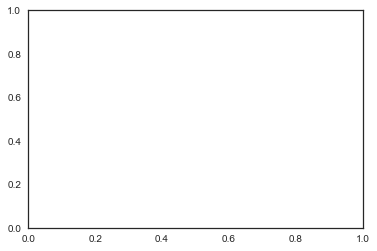

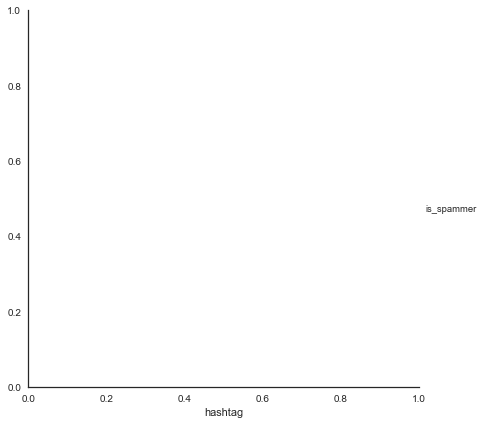

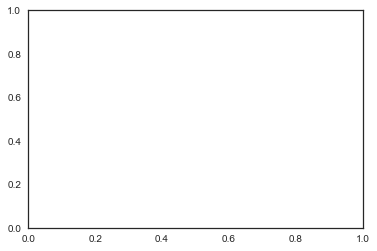

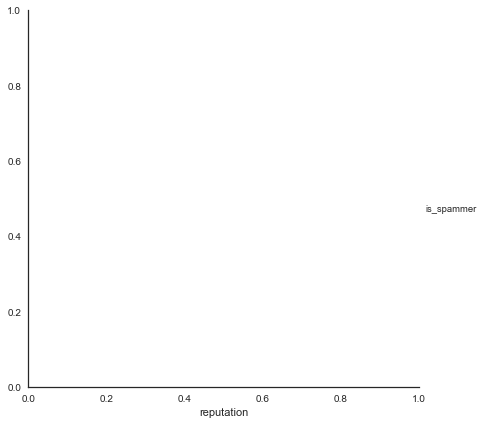

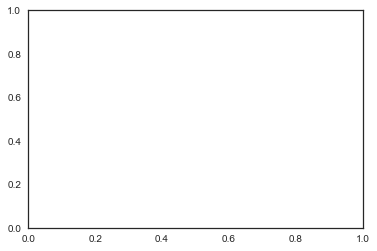

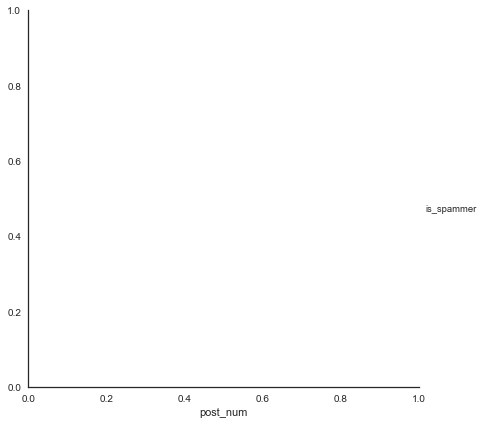

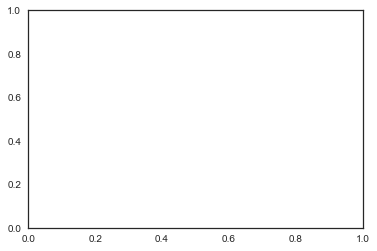

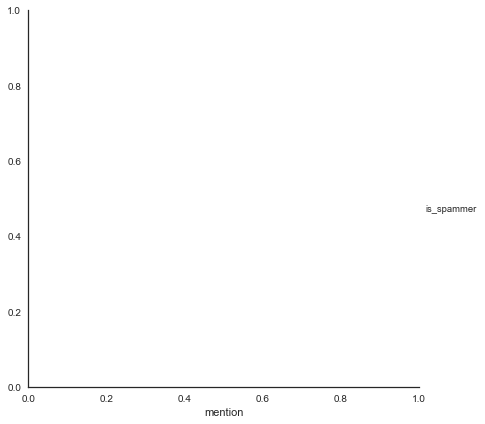

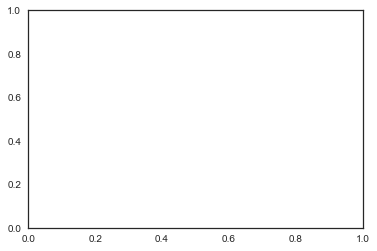

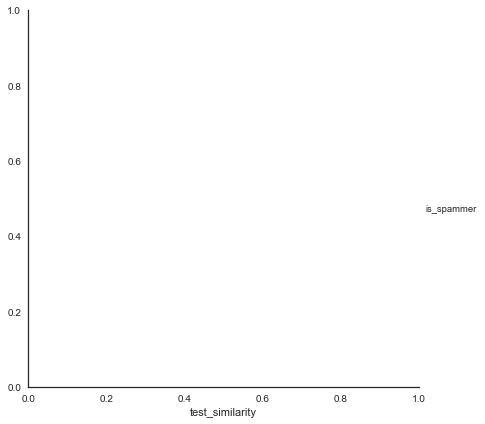

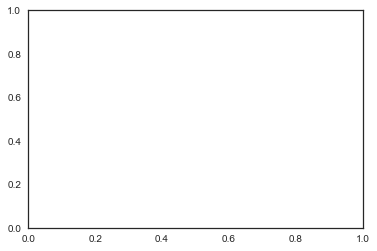

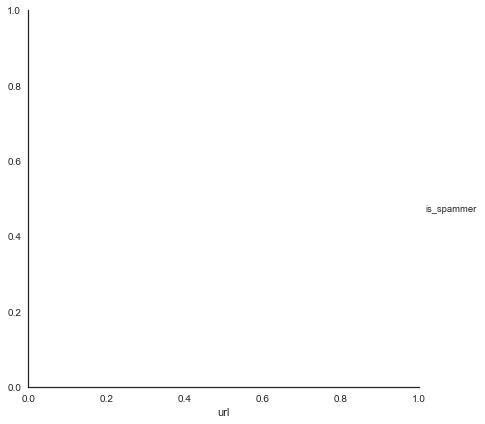

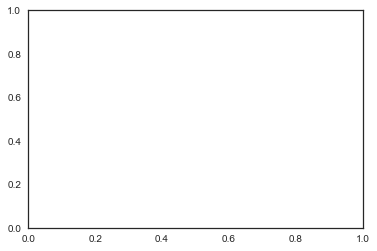

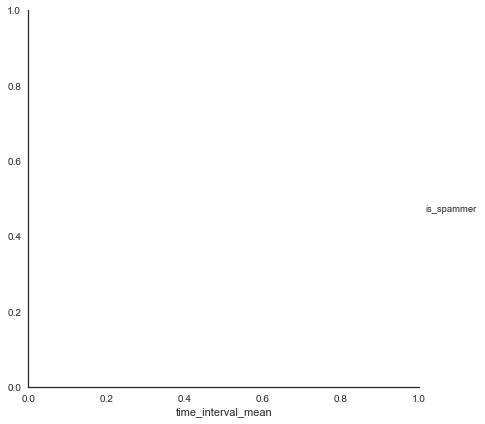

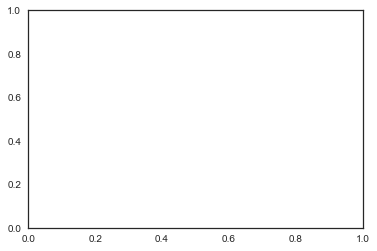

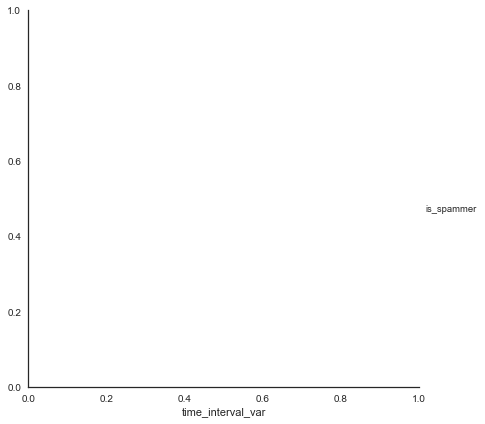

In [8]:
from IPython.display import display
for column_name in data.columns:
    if column_name != "is_spammer":
        # box plot
        # sns.boxplot(x="is_spammer", y="time_interval_var", data=data)
        fig, axes = plt.subplots()
#         dis = sns.violinplot(x="is_spammer", y=column_name, data=data, size=6)     
        sns.FacetGrid(data, hue="is_spammer", size=6).map(sns.kdeplot, column_name).add_legend()

ValueError: min() arg is an empty sequence

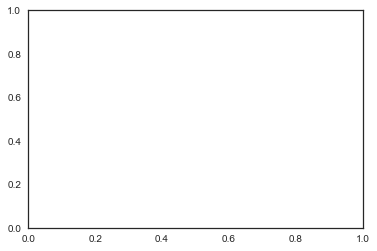

In [9]:
from IPython.display import display
for column_name in data.columns:
    if column_name != "is_spammer":
        fig, axes = plt.subplots()        
        # box plot
        sns.boxplot(x="is_spammer", y="time_interval_var", data=data)
#         dis = sns.violinplot(x="is_spammer", y=column_name, data=data, size=6)     

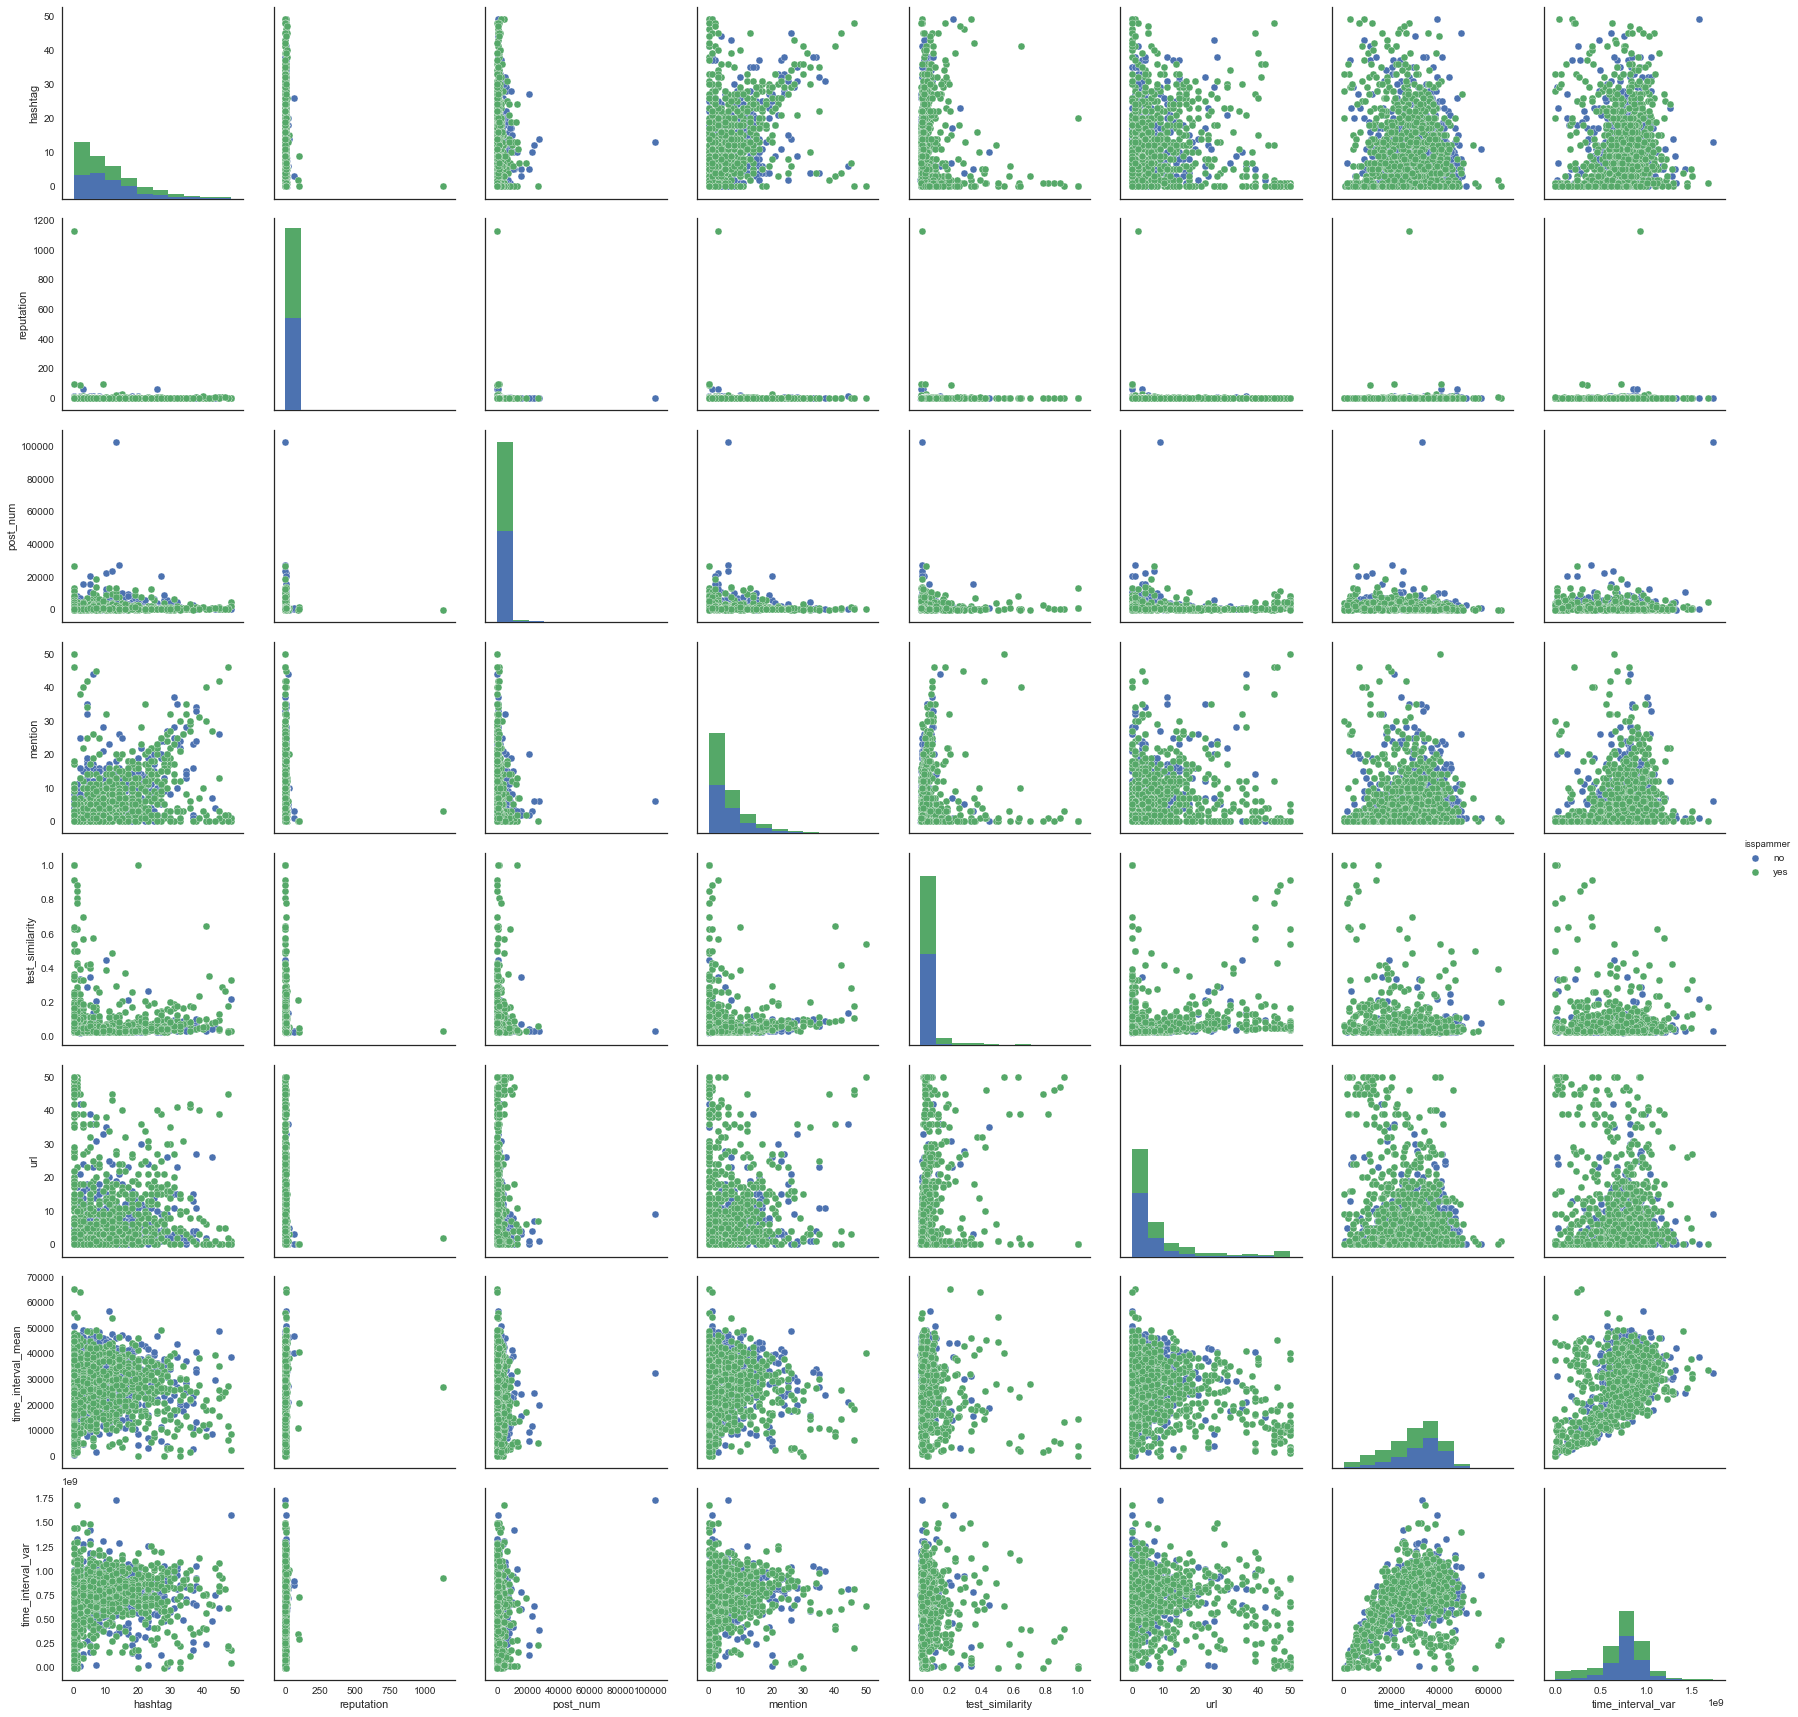

In [31]:
sns.pairplot(data, hue="is_spammer", size=3)